Examen Final: Semana 0 - Estadística Descriptiva Estratégica

**Caso de Estudio: FinTechValpo**

Eres el Analista Principal de Business Intelligence para "FinTechValpo", una startup chilena que ofrece dos planes de suscripción para su plataforma de gestión financiera:

Plan "Standard": Un plan básico y económico.

Plan "Premium": Un plan más caro con funcionalidades avanzadas.

La gerencia te ha encargado analizar los datos de rendimiento de ambos planes para tomar decisiones estratégicas clave para el próximo trimestre.

In [1]:
# Conjunto de datos:
import pandas as pd
import numpy as np

# Semilla para reproducibilidad
np.random.seed(42)

# Datos del Plan Standard
n_standard = 200
standard_revenue = np.random.normal(loc=10000, scale=1000, size=n_standard).astype(int)
standard_sessions = np.random.poisson(lam=15, size=n_standard)
standard_satisfaction = np.random.normal(loc=5.5, scale=0.8, size=n_standard).clip(1, 10)

# Datos del Plan Premium
n_premium = 80
# Ingresos con outliers (clientes 'ballena')
premium_revenue = np.random.normal(loc=35000, scale=8000, size=n_premium).astype(int)
premium_revenue[5:8] = np.random.normal(loc=150000, scale=20000, size=3).astype(int) # Outliers
# Sesiones con asimetría positiva (muchos poco activos, pocos 'power users')
premium_sessions = np.random.gamma(shape=2, scale=10, size=n_premium).astype(int) + 5
# Satisfacción polarizada
premium_satisfaction_low = np.random.normal(loc=4, scale=1, size=n_premium//2)
premium_satisfaction_high = np.random.normal(loc=9, scale=0.5, size=n_premium//2)
premium_satisfaction = np.concatenate([premium_satisfaction_low, premium_satisfaction_high]).clip(1,10)


# Crear DataFrame
df_standard = pd.DataFrame({
    'plan_type': 'Standard',
    'monthly_revenue_clp': standard_revenue,
    'sessions_per_month': standard_sessions,
    'satisfaction_score': standard_satisfaction
})

df_premium = pd.DataFrame({
    'plan_type': 'Premium',
    'monthly_revenue_clp': premium_revenue,
    'sessions_per_month': premium_sessions,
    'satisfaction_score': premium_satisfaction
})

df = pd.concat([df_standard, df_premium], ignore_index=True)

# Mezclar aleatoriamente el dataframe
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

Preguntas del Examen
Pregunta 1: El Dilema de la Rentabilidad (3 Puntos)

La gerencia te pregunta: "¿Qué plan es más rentable y en cuál deberíamos enfocar nuestros esfuerzos de marketing?". Un análisis superficial podría ser engañoso.

a) Calcula la media y la mediana de los ingresos mensuales (monthly_revenue_clp) para cada tipo de plan.

b) ¿Cuál de estas dos métricas (media o mediana) crees que representa de forma más fidedigna la "rentabilidad típica" de un cliente en cada plan? Justifica tu respuesta basándote en la posible forma de la distribución de los datos.

c) Calcula la desviación estándar y el coeficiente de variación (CV) para los ingresos de cada plan. ¿Qué nos dice el CV sobre el riesgo o la predictibilidad de los ingresos de cada plan?

d) Basado en tu análisis completo (a, b, c), ¿qué plan recomendarías para una campaña de marketing que busca crecimiento estable y predecible? ¿Y si la campaña busca maximizar el ingreso potencial a pesar del riesgo?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   plan_type            280 non-null    object 
 1   monthly_revenue_clp  280 non-null    int64  
 2   sessions_per_month   280 non-null    int64  
 3   satisfaction_score   280 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 8.9+ KB


In [6]:
df.head(5)

,plan_type,monthly_revenue_clp,sessions_per_month,satisfaction_score
0,Standard,8942,14,5.158495
1,Standard,10257,16,3.834456
2,Premium,34604,19,8.664188
3,Premium,40063,38,9.498133
4,Standard,10293,9,4.740481


In [7]:
# promedio por tipo de plan
df['plan_type']

,plan_type
0,Standard
1,Standard
2,Premium
3,Premium
4,Standard
...,...
275,Standard
276,Standard
277,Standard
278,Premium


In [8]:
# a) Calcula la media y la mediana de los ingresos mensuales (monthly_revenue_clp) para cada tipo de plan.
revenue_stats = df.groupby('plan_type')['monthly_revenue_clp'].agg(['mean', 'median'])
display(revenue_stats)

,mean,median
plan_type,,
Premium,40735.0875,35263.0
Standard,9958.7450,9995.5


b) ¿Cuál de estas dos métricas (media o mediana) crees que representa de forma más fidedigna la "rentabilidad típica" de un cliente en cada plan? Justifica tu respuesta basándote en la posible forma de la distribución de los datos.

In [9]:
# Evidentemente estamos ante outliers, la mediana es una medida más robusta de los datos.
c_v = (df.groupby('plan_type')['monthly_revenue_clp'].std()/df.groupby('plan_type')['monthly_revenue_clp'].mean())*100
display(c_v)

,monthly_revenue_clp
plan_type,
Premium,62.503218
Standard,9.348534


In [ ]:
# Dado que el coeficiente de variabilidad de los datos en el plan premium es muy alta, al ser superior al 30%
# decimos que los datos son muy heterogéneos, mientras que los del plan Standard son muy homogéneos.
# Por lo tanto, al tener datos tan dispersos, una mejor medida (más robusta) es la mediana.

c) Calcula la desviación estándar y el coeficiente de variación (CV) para los ingresos de cada plan. ¿Qué nos dice el CV sobre el riesgo o la predictibilidad de los ingresos de cada plan?

In [10]:
desv_estandar = df.groupby('plan_type')['monthly_revenue_clp'].std()
display(desv_estandar)

,monthly_revenue_clp
plan_type,
Premium,25460.740659
Standard,930.996618


In [ ]:
# El C.V ya lo calculé anteriormente, y como se mencionó, el CV nos dice que los ingresos del plan premium son más impredecibles, más riesgosos.

d) Basado en tu análisis completo (a, b, c), ¿qué plan recomendarías para una campaña de marketing que busca crecimiento estable y predecible? ¿Y si la campaña busca maximizar el ingreso potencial a pesar del riesgo?

In [ ]:
# En base a las medidas de tendencia central y de dispersión.
# Para una campaña de crecimiento estable y predecible promocionaría el plan Standard. Para el plan de Riesgo (dado el CV) promocionaría el plan Premium, que si bien es más caro, ofrece mayores retornos, solo para valientes.

Pregunta 2: El Enigma del Engagement (2 Puntos)

El equipo de producto del plan Premium está preocupado. Algunos gerentes sienten que "el engagement promedio es bajo", mientras que otros dicen que tienen "los usuarios más leales". Quieren saber qué está pasando realmente.

a) Filtra el DataFrame para analizar únicamente a los usuarios del plan Premium.

b) Calcula la media, la mediana y la asimetría (skewness) de la variable sessions_per_month.

c) Interpreta el valor de la asimetría. ¿Qué te dice la relación entre la media y la mediana sobre la distribución de la actividad de los usuarios? ¿Cómo explica esto la percepción contradictoria que tiene el equipo de producto?

In [2]:
usuario_premium = df[df['plan_type']=='Premium']

In [3]:
u_p = usuario_premium['sessions_per_month'].mean()
u_m = usuario_premium['sessions_per_month'].median()
u_s = usuario_premium['sessions_per_month'].skew()

In [4]:
print(f'Media: {u_p}')
print(f'Mediana: {u_m}')
print(f'Asimetria: {u_s}')

Media: 24.05
Mediana: 22.5
Asimetria: 1.2984348503158585


In [ ]:
# La Asimetría nos indica si la distribución de los datos es simétrica o está sesgada hacia un lado. En este caso, dado que la Asimetris nos arroja un valor mayor que 1, claramente la distribución de los datos está en la parte izquierda, ya que la cola es más larga a la derecha. Por esto, tenemos algunos outliers altos que tiran la media a la derecha y es ligeramente superior a la mediana.
# En Engagment promedio es bajo, pero hay algunas sesiones por mes que son más altas y tiran el promedio más arriba.

Pregunta 3: La Percepción del Cliente (2 Puntos)

El equipo de Experiencia de Usuario (UX) quiere entender la satisfacción de los clientes en ambos planes para decidir dónde enfocar las mejoras.

a) Genera una visualización (se recomienda un boxplot o histogramas superpuestos) que compare las distribuciones de satisfaction_score para los planes Standard y Premium.

b) Calcula la curtosis (kurtosis) para la distribución de la satisfacción de cada plan.

c) Interpreta tus hallazgos. ¿Qué plan tiene una experiencia de usuario más consistente? ¿Qué significa la forma de la distribución del plan Premium (sugerida por la visualización y la curtosis) en términos de la experiencia del cliente? ¿Qué riesgo estratégico implica esto?



In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Primero filtraré y agruparé los datos que quiero utilizar
satisfaction_standard = df[df['plan_type']=='Standard']['satisfaction_score']
satisfaction_premium = df[df['plan_type']=='Premium']['satisfaction_score']

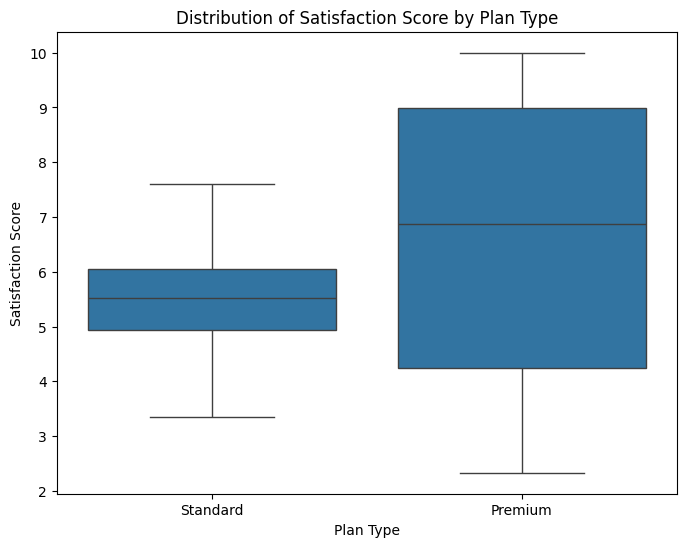

In [9]:
# a) Genera una visualización (se recomienda un boxplot o histogramas superpuestos)
# que compare las distribuciones de satisfaction_score para los planes Standard y Premium.

plt.figure(figsize=(8, 6))
sns.boxplot(x='plan_type', y='satisfaction_score', data=df)
plt.title('Distribution of Satisfaction Score by Plan Type')
plt.xlabel('Plan Type')
plt.ylabel('Satisfaction Score')
plt.show()

In [7]:
# Calcularé la curtosis para la distribución de la satisfacción de cada plan
curtosis_standard = satisfaction_standard.kurtosis()
curtosis_premium = satisfaction_premium.kurtosis()

In [11]:
# b) Calcula la curtosis (kurtosis) para la distribución de la satisfacción de cada plan.
curtosis_standard = satisfaction_standard.kurtosis()
curtosis_premium = satisfaction_premium.kurtosis()

print(f"Kurtosis of Satisfaction Score (Standard): {curtosis_standard:.2f}")
print(f"Kurtosis of Satisfaction Score (Premium): {curtosis_premium:.2f}")

Kurtosis of Satisfaction Score (Standard): -0.12
Kurtosis of Satisfaction Score (Premium): -1.69
